In [43]:
#packages for editing data sets
import pandas as pd
import numpy as np

#packages for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb

In [44]:
df = pd.read_csv("/Dataset - Train.csv")
df.head(6)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product


In [45]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8588,3291,8589
unique,8561,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


In [46]:
df["emotion_in_tweet_is_directed_at"].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [47]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2672
Negative emotion                       519
I can't tell                             9
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [48]:
#get rid of duplicate tweets in dataset
data = df.drop_duplicates(subset=["tweet_text"])
data.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8561,3280,8562
unique,8561,9,4
top,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPad,No emotion toward brand or product
freq,1,943,5373


In [52]:
#make a dataset without "I can't tell"
data_pos_or_neg =  data[data['is_there_an_emotion_directed_at_a_brand_or_product'] != "I can't tell"]
data_pos_or_neg.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,8552,3271,8553
unique,8552,9,3
top,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPad,No emotion toward brand or product
freq,1,939,5373


In [50]:
emotioncount = data_pos_or_neg["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

([<matplotlib.patches.Wedge at 0x7c6b82624160>,
 [Text(-0.43114903428485635, 1.0119834535382661, 'Negative emotion'),
  Text(0.23198213821270655, -1.075260102277705, 'Positive emotion'),
  Text(1.0801493769555082, -0.20803202508899396, 'No emotion toward brand or product')],
 [Text(-0.2351722005190125, 0.551990974657236, '62.8%'),
  Text(0.12653571175238537, -0.5865055103332937, '31.1%'),
  Text(0.5891723874302771, -0.11347201368490578, '6.1%')])

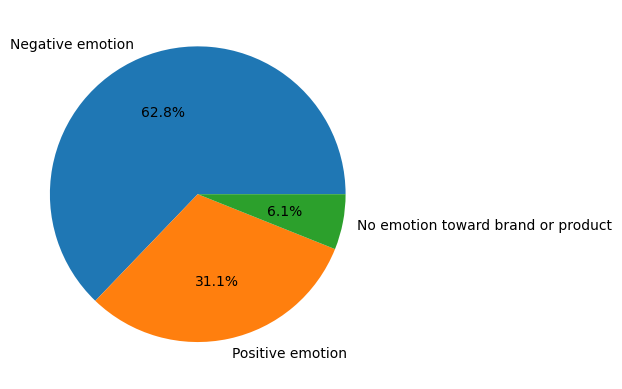

In [53]:
#pie chart for percentage of emotions
emotions = data_pos_or_neg["is_there_an_emotion_directed_at_a_brand_or_product"].unique()
fig, ax = plt.subplots()
ax.pie(emotioncount,labels=emotions,autopct='%1.1f%%')

In [54]:
products = data_pos_or_neg["emotion_in_tweet_is_directed_at"].unique()
print(products)

['iPhone' 'iPad or iPhone App' 'iPad' 'Google' nan 'Android' 'Apple'
 'Android App' 'Other Google product or service'
 'Other Apple product or service']
